In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

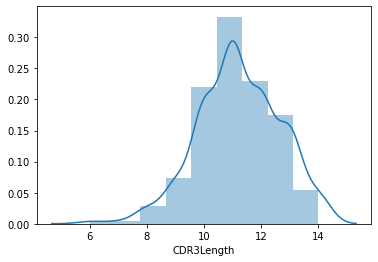

In [41]:
seqList = []
idList = []
CDR3List = []
lenCDR3List = []
i = 0


MotifUpstream = 'AVYYC'
MotifDownstream = 'WGQGT'
FileToOpen = 'TestSeqs.fasta'

with open(FileToOpen, 'r') as seqsFile:
    Lines = seqsFile.readlines()
    for line in Lines:
        if i % 2 == 0:
            idList.append(line[1:].rstrip('\n'))
        else:
            seqList.append(line.rstrip('\n'))
        i+=1
        
ZipIdSeqs = zip(idList,seqList)
dfSeqs = pd.DataFrame(ZipIdSeqs, columns = ['id', 'seq'])


for seq in dfSeqs['seq']:
    CDR3 = re.search(f'{MotifUpstream}(.+?){MotifDownstream}', seq)
    CDR3List.append(CDR3.group(1))
    lenCDR3List.append(len(CDR3.group(1)))

dfSeqs['CDR3Seq'] = CDR3List
dfSeqs['CDR3Length'] = lenCDR3List
NumBins = max(dfSeqs.CDR3Length) - min(dfSeqs.CDR3Length) +1
fig = sns.distplot(dfSeqs.CDR3Length, bins = NumBins)
fig.savefig('CDR3LengthHistogram.png')

,id,seq,CDR3Seq,CDR3Length
0,seq0,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLE...,RARGYSGDPDY,11
1,seq1,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLE...,ARARGYSGYDPD,12
2,seq2,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLE...,RARGSGDPFD,10
3,seq3,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLE...,ARRGSGYDPFDY,12
4,seq4,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLE...,ARGYSGYPDY,10


In [20]:
for seq in dfSeqs['seq']:
    print(seq)

QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSITTAYLELSSLRSDDTAVYYCRARGYSGDPDYWGQGTLVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSITTAYLELSSLRSDDTAVYYCARARGYSGYDPDWGQGTLVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSITTAYLELSSLRSDDTAVYYCRARGSGDPFDWGQGTLVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSITTAYLELSSLRSDDTAVYYCARRGSGYDPFDYWGQGTLVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSITTAYLELSSLRSDDTAVYYCARGYSGYPDYWGQGTLVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSITTAYLELSSLRSDDTAVYYCARARGYSGDFDYWGQGTLVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSITTAYLELSSLRSDDTAVYYCARRGSGYDPFDYWGQGTLVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSITTAYLELSSLRSDDTAVYYCRARGYSGYDPFDWGQGTLVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYIHWVRRAPGQGL

limit_output extension: Maximum message size of 10000 exceeded with 59609 characters

<AxesSubplot:xlabel='CDR3Length'>

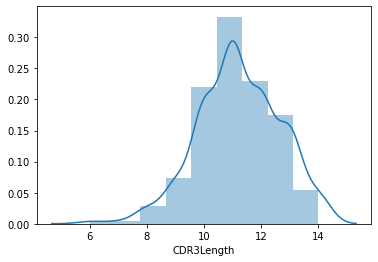

In [38]:
sns.distplot(dfSeqs.CDR3Length, bins = 9)

In [35]:
min(dfSeqs.CDR3Length)

6